# Speed test with Python

# Basic Code 

In [2]:
#Libraries
import speedtest
import datetime
import pprint
import csv
import matplotlib.pyplot as plt
import pandas as pd

In [118]:
# Create the database
with open('Speedtest.csv', 'w') as csv_file:
    headnames = ['time','download','upload','ping','isp','ip']
    keyboard = csv.DictWriter(csv_file, fieldnames=headnames)
    keyboard.writeheader()

In [3]:
# Get server values
bits_in_Megabits = 1048576 # 2^20
s = speedtest.Speedtest()
s.get_best_server()
print('Process Done!')

Process Done!


# Cicle code

In [7]:
# Run as many times you want
s.download()
s.upload()
res = s.results.dict()

with open('Speedtest.csv', 'a') as csv_file:
    keyboard = csv.writer(csv_file)


    time = datetime.datetime.now().strftime("%d/%m/%y %H:%M:%S")
    download = round(res["download"]/bits_in_Megabits,2)
    upload = round(res["upload"]/bits_in_Megabits,2)
    ping = round(res["ping"])
    isp = res["client"]["isp"]
    ip = res["client"]["ip"]
    keyboard.writerow([time,download,upload,ping,isp,ip])

print('Process Done!')

Process Done!


In [121]:
# Print the whole data
#Uncomment# pprint.pprint(res, width=1)


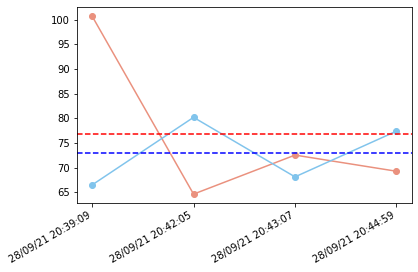

In [8]:
# Graph the values

df = pd.read_csv('Speedtest.csv')

t = df['time']
down = df['download']
up = df['upload']
mean_download = df["download"].mean()
mean_upload = df["upload"].mean()

fig, ax = plt.subplots()

ax.plot_date(t, down, color='#EA917E', linestyle='-')
ax.plot_date(t, up, color='#81C4EC', linestyle='-')
ax.axhline(y=mean_download, color='r', linestyle='--')
ax.axhline(y=mean_upload, color='b', linestyle='--')

fig.autofmt_xdate()
plt.show()

